In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sys
import json
import os
import numpy as np

# Make a matrix plot to visualize different types of discrepancies captured by different models
results_dir = "/mnt/6TB/dockerMLcerts/attached_dir/all_results/testing-results"

# Iterate through results, ignoring 0000 or 1111, and only including discrepancies (i.e., 1011)
models = {}
all_patterns = set()

for arch_dir in os.listdir(results_dir):
    print("Now processing architecture ", arch_dir, "...")

    # if arch_dir != "v3" and arch_dir != "transcert" and arch_dir != "frankencerts-large" and arch_dir != "zmapOriginalCerts" and arch_dir != "v3-experiments-extra" and arch_dir != "v3-chain":
    #     continue

    if arch_dir != "v3" and arch_dir != "transcert" and arch_dir != "frankencerts-large" and arch_dir != "zmapOriginalCerts":
        continue
        
    for dir in os.listdir(results_dir + "/" + arch_dir):        
        if "seeds10k" in dir:
            continue

        print("Now processing model ", dir, "...")
        
        models[arch_dir + "/" + dir] = []
        for f in os.listdir(results_dir + "/" + arch_dir + "/" + dir + "/json/"):
            if ".json" in f:
                with open(results_dir + "/" + arch_dir + "/" + dir + "/json/" + f) as oF:
                    data = json.load(oF)
                    this_pattern = ""
                    for elem in data:
                        this_pattern += str((int(data[elem] != 0)))
                    if not (this_pattern == '00000' or this_pattern == '11111'):
                        models[arch_dir + "/" + dir].append(this_pattern)
                        all_patterns.add(this_pattern)
        print("Total patterns, this patterns", len(all_patterns), len(set(models[arch_dir + "/" + dir])))

# for dir in os.listdir(results_dir):
#     print("Now processing model ", dir, "...")
#     models[dir] = []
#     for f in os.listdir(results_dir + "/" + dir + "/json/"):
#         if ".json" in f:
#             with open(results_dir + "/" + dir + "/json/" + f) as oF:
#                 data = json.load(oF)
#                 this_pattern = ""
#                 for elem in data:
#                     this_pattern += str((int(data[elem] != 0)))
#                 if not (this_pattern == '00000' or this_pattern == '11111'):
#                     models[dir].append(this_pattern)
#                     all_patterns.add(this_pattern)
print("Here is a list of all unique patterns", all_patterns)
print("Generating figure now...")

Now processing architecture  frankencerts-large ...
Now processing model  frankencerts-v1-8M ...


dict_keys(['frankencerts-large/frankencerts-v1-8M', 'v3/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/balanced-versions', 'v3/zmap-data-custom', 'v3/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/2022-scanned-custom', 'v3/balanced-versions-custom', 'v3/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/2022-scanned', 'v3/balanced-versions-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/zmap-data', 'zmapOriginalCerts/zmapOriginalCerts', 'transcert/seeds30k'])
frankencerts-large/frankencerts-v1-8M
v3/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000
v3/balanced-versions
v3/zmap-data-custom
v3/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000
v3/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000
v3/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000
v3/2022-scanned-custom
v3/balanced-versio

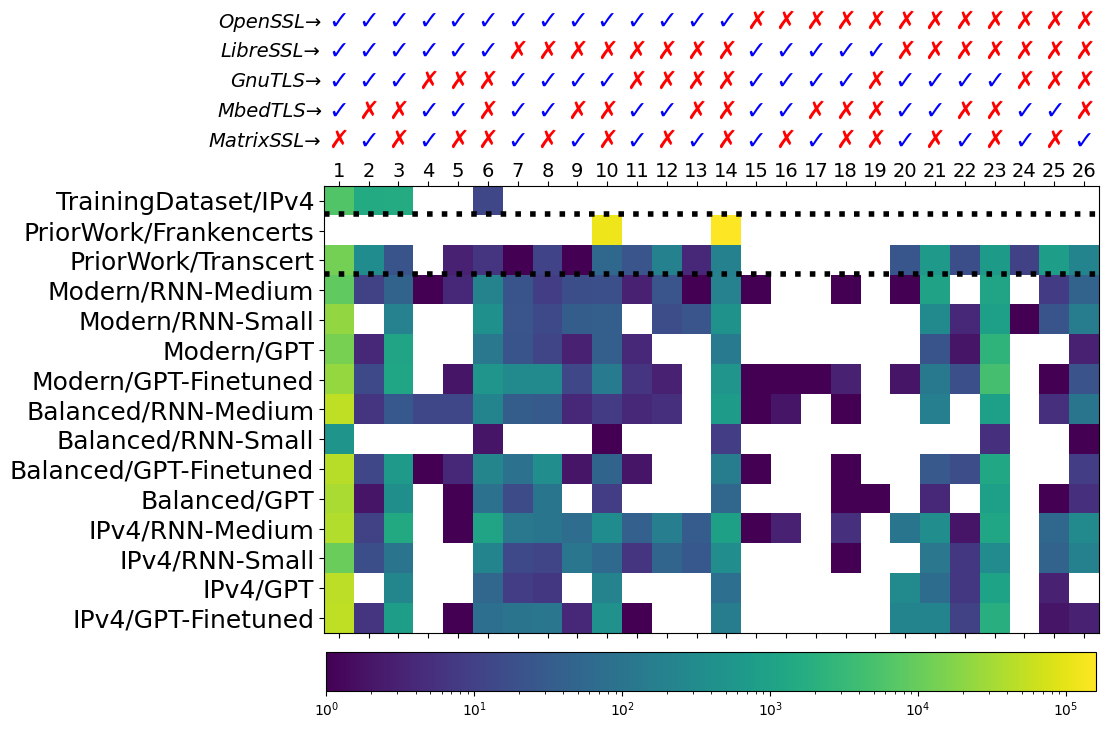

In [24]:
# To help with labels
labels_translation = {
                     "v3/2022-scanned": "Modern/GPT-Finetuned",
                     "v3/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "Modern/RNN-Medium",
                     "v3/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000": "Modern/RNN-Small",
                     "v3/2022-scanned-custom": "Modern/GPT",
                     
                     "v3/balanced-versions": "Balanced/GPT-Finetuned",
                     "v3/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "Balanced/RNN-Medium",
                     "v3/balanced-versions-256-3-0.0002lr-0.1dropout-epoch3-step300000": "Balanced/RNN-Small",
                     "v3/balanced-versions-custom": "Balanced/GPT",
                      
                     "v3/zmap-data": "IPv4/GPT-Finetuned",
                     "v3/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "IPv4/RNN-Medium",
                     "v3/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000": "IPv4/RNN-Small",
                     "v3/zmap-data-custom": "IPv4/GPT",

                     "v3-chain/2022-scanned": "Modern/GPT-Finetuned-CHAIN",
                     "v3-chain/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "Modern/RNN-Medium-CHAIN",
                     "v3-chain/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000": "Modern/RNN-Small-CHAIN",
                     "v3-chain/2022-scanned-custom": "Modern/GPT-CHAIN",
                     
                     "v3-chain/balanced-versions": "Balanced/GPT-Finetuned-CHAIN",
                     "v3-chain/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "Balanced/RNN-Medium-CHAIN",
                     "v3-chain/balanced-versions-256-3-0.0002lr-0.1dropout-epoch3-step300000": "Balanced/RNN-Small-CHAIN",
                     "v3-chain/balanced-versions-custom": "Balanced/GPT-CHAIN",
                      
                     "v3-chain/zmap-data": "IPv4/GPT-Finetuned-CHAIN",
                     "v3-chain/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "IPv4/RNN-Medium-CHAIN",
                     "v3-chain/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000": "IPv4/RNN-Small-CHAIN",
                     "v3-chain/zmap-data-custom": "IPv4/GPT-CHAIN",

                     "frankencerts-large/frankencerts-v1-8M": "PriorWork/Frankencerts",
                     "transcert/seeds30k": "PriorWork/Transcert",
                     # "frankencerts/frankencerts-v1": "PriorWork/Frankencerts",
                     "zmapOriginalCerts/zmapOriginalCerts": "TrainingDataset/IPv4",

                     "v3-experiments-extra/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T1.5": "RNN-ORACLE",
                     }

# Dummy data to debug visualization
# all_patterns = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
# models = {"first": {1, 2}, "second": {1, 2, 3, 4, 5, 6, 7}, "third": {1}, "final": {7}, "afirst": {1, 2}, "asecond": {1, 2, 3, 4, 5, 6, 7}, "athird": {1}, "afinal": {7}}

# Build 2D array for matrix plot
#all_patterns = list(sorted(all_patterns, key=lambda x: x.count('0')))
all_patterns = list(sorted(all_patterns))
#all_patterns = list(sorted(all_patterns))

arr = []
y_labels = []
new_name_results = {}
for m in models:
#     if "ORIGINAL" in m:
#         new_name = m
#     else:
#     # Combine models results into another name
# #         new_name = m.split("/")[0] # Default or V3 or V3-CHAIN
        
# #         new_name = m.split("/")[1].split("-", 1)[0] # ZMAP or 2022 or Balanced
        
#         new_name = m.split("/")[1].split("-") # gpt-neo-default or gpt-neo-custom or 256-3...
#         if len(new_name) > 3:
#             new_name = ''.join(new_name[2:3])
#         elif len(new_name) == 3:
#             new_name = "gpt-neo-custom"
#         else:
#             new_name = "gpt-neo-default"

#     if "V3-EXPERIMENTS" not in m:
#         continue
       
#     if not "0T" in m:
#         continue    

    new_name = m
    if new_name not in new_name_results:
        new_name_results[new_name] = {}

    for x in all_patterns:
        if x not in new_name_results[new_name]:
            new_name_results[new_name][x] = 0
        
        new_name_results[new_name][x] += models[m].count(x)
    
# Reorder the dictionary to ensure "Z" is the last item
new_name_results_ordered = {key: new_name_results[key] for key in sorted(new_name_results.keys(), key=lambda k: k != "XXX", reverse = False)}
print(new_name_results_ordered.keys())

for xxx in ["zmapOriginalCerts/zmapOriginalCerts", "frankencerts-large/frankencerts-v1-8M", "transcert/seeds", "v3/2022", "v3/balanced", "v3/zmap"]:
    if xxx in ["frankencerts-large/frankencerts-v1-8M", "zmapOriginalCerts/zmapOriginalCerts", "transcert/seeds"]:
        additional_order = "/"
    else:
        additional_order= ["RNN-Medium", "RNN-Small", "GPT"]
    
    for yyy in additional_order:
        for name in list(new_name_results_ordered):
            print(name)
            
            if xxx in name and yyy in labels_translation[name]:
                final_arr = []
                for x in all_patterns:
                    final_arr.append(new_name_results[name][x])

                arr.append(final_arr)
                y_labels.append(labels_translation[name])

figure = plt.figure(figsize=(10, 10))
axes = figure.add_subplot(111)
print(arr, y_labels)

# using the matshow() function
caxes = axes.matshow(arr, norm=colors.LogNorm())
plt.colorbar(caxes,fraction=0.05, pad=0.025, location="bottom")

# axes.set_xticks(np.arange(-.5, 10, 1), minor=True)
# axes.set_yticks(np.arange(-.5, 14, 1), minor=True)
# axes.grid(which='minor', color='w', linestyle='-', linewidth=2)

# Calculate the vertical offset for labels
label_offset = 0.5  # Adjust this value to control spacing

digit_convert = {"0": "✓", "1": "✗"}
color_convert = {"0": "blue", "1": "red"}
# Create vertical labels for each digit
for i, pattern in enumerate(all_patterns):
    x = i  # X-coordinate for the label 
    
    # Add each digit as a separate label with vertical offset above the heatmap
    addedNum = False
    for j, digit in enumerate(pattern):
        if not addedNum:
            axes.text(x, -1, i+1, fontsize=14, ha='center', va='center', zorder=2, color='black')  # Set zorder to 2
            addedNum = True
            
        y = j - 6  # Shift the vertical position above the heatmap
        axes.text(x, y, digit_convert[digit], fontsize=18, ha='center', va='center', zorder=2, color=color_convert[digit])  # Set zorder to 2

axes.text(-2.3, -6, "OpenSSL→", fontsize=14, ha='center', va='center', zorder=2, fontstyle='italic')
axes.text(-2.3, -5, "LibreSSL→", fontsize=14, ha='center', va='center', zorder=2, fontstyle='italic')
axes.text(-2.1, -4, "GnuTLS→", fontsize=14, ha='center', va='center', zorder=2, fontstyle='italic')
axes.text(-2.3, -3, "MbedTLS→", fontsize=14, ha='center', va='center', zorder=2, fontstyle='italic')
axes.text(-2.5, -2, "MatrixSSL→", fontsize=14, ha='center', va='center', zorder=2, fontstyle='italic')
        
# Set the tick locations and labels
axes.set_xticks(np.arange(len(all_patterns)))
axes.set_xticklabels([""] * len(all_patterns))  # Empty labels for original x-axis

plt.axhline(y = .45, color = 'black', linestyle = 'dotted', linewidth='4', xmin=0, xmax=10) 
plt.axhline(y = 2.45, color = 'black', linestyle = 'dotted', linewidth='4', xmin=0, xmax=10) 

#axes.set_xticks(ticks=range(0, len(all_patterns)), labels=all_patterns, rotation='vertical', fontsize=18)
axes.set_yticks(ticks=range(0, len(y_labels)), labels=y_labels, fontsize=18)

plt.savefig('/home/XYZ/notebook/MLcertsJupyter/Figures/matrix.pdf', bbox_inches='tight')

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate a sample matrix
# data = np.random.rand(10, 10)

# # Create a figure and an axes
# fig, ax = plt.subplots()

# # Use matshow to plot the matrix
# cax = ax.matshow(data, cmap='viridis')

# # Add a colorbar
# fig.colorbar(cax)

# # Draw a horizontal line at y = 5 in figure coordinates
# line_y = 5
# line = plt.Line2D([0, 1], [line_y / data.shape[0], line_y / data.shape[0]], color='r', linestyle='--', transform=fig.transFigure)
# fig.add_artist(line)

# # Adjust layout to make sure labels are included properly
# plt.tight_layout()

# # Show the plot
# plt.show()
